# PyPI qqman GWAS plots  

Using original PSP WES data files

#### Imports & setup

In [1]:
import os
import pandas as pd
from qqman import qqman
import matplotlib.pyplot as plt

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#### File I/O variables

In [2]:
dir_gwas = '../data/gwas_plink'
plink_assoc = 'psp_adsp.common_PCA.pass_qc.maf_common_05.assoc._no_covar.assoc'
plink_logistic = 'psp_adsp.common_PCA.pass_qc.maf_common_05.logistic.covar_PC1.assoc.logistic'

dir_plot = '../data/gwas_plink/plots_pypi_qqman'


#### setup variables

In [3]:
gwas_file_assoc = os.path.join(dir_gwas, plink_assoc)
plot_prefix_assoc = os.path.join(dir_plot, plink_assoc)

gwas_file_logistic = os.path.join(dir_gwas, plink_logistic)
plot_prefix_logistic = os.path.join(dir_plot, plink_logistic)


## create output directory (if needed)
!mkdir -p {dir_plot}

<br>  

## plot PLINK --assoc output

In [4]:
!head {gwas_file_assoc}

 CHR           SNP         BP   A1      F_A      F_U   A2        CHISQ            P           OR 
   1      1_953259     953259    T  0.05912  0.05531    C       0.2466       0.6194        1.073 
   1      1_953279     953279    T  0.06082  0.05531    C       0.5024       0.4785        1.106 
   1      1_962358     962358    T  0.07322  0.06468    C        1.097       0.2949        1.142 
   1      1_965125     965125    C   0.2836   0.2817    G      0.01481       0.9031        1.009 
   1     1_1014228    1014228    A   0.3863   0.3881    G      0.01169       0.9139       0.9924 
   1     1_1014274    1014274    A  0.06785  0.05472    G          2.8      0.09426        1.257 
   1     1_1047614    1047614    T  0.07869  0.07916    C     0.002751       0.9582       0.9936 
   1     1_1051820    1051820    C    0.091  0.08901    T      0.04355       0.8347        1.025 
   1     1_1085966    1085966    G   0.1756     0.16    A        1.666       0.1969        1.118 


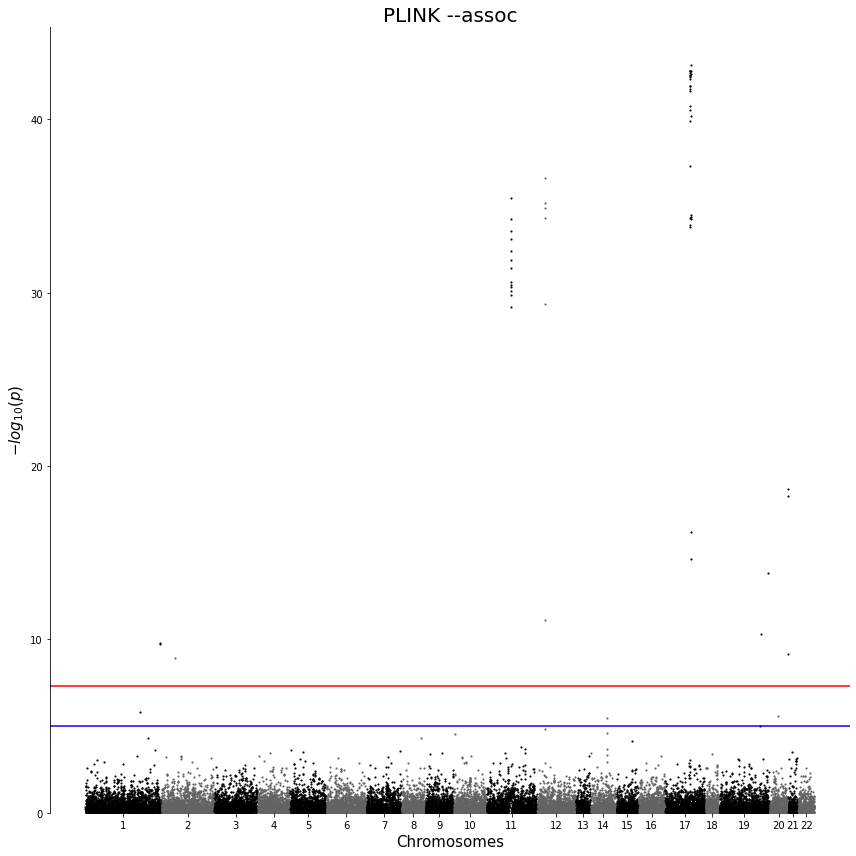

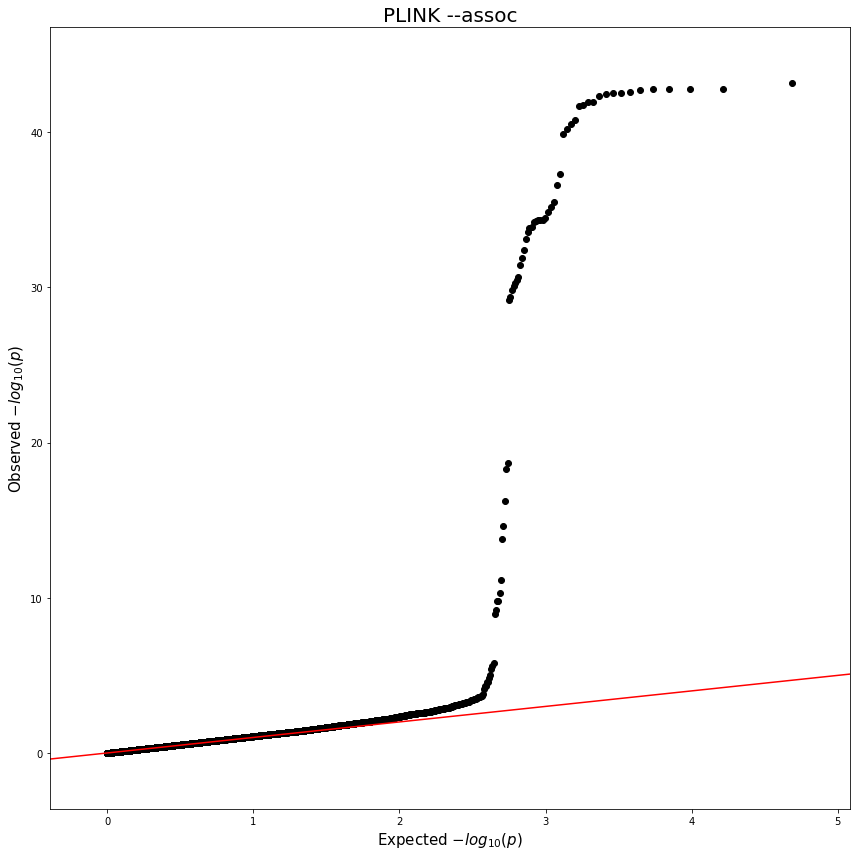

In [5]:
## generate Manhattan plot
qqman.manhattan(gwas_file_assoc, 
                out=plot_prefix_assoc+'.Manhattan.png', 
                show=True, 
                title='PLINK --assoc')

## generate qqplot
qqman.qqplot(gwas_file_assoc, 
                out=plot_prefix_assoc+'.qqplot.png', 
                show=True, 
                title='PLINK --assoc')


#### Generate --assoc plots as subplot example

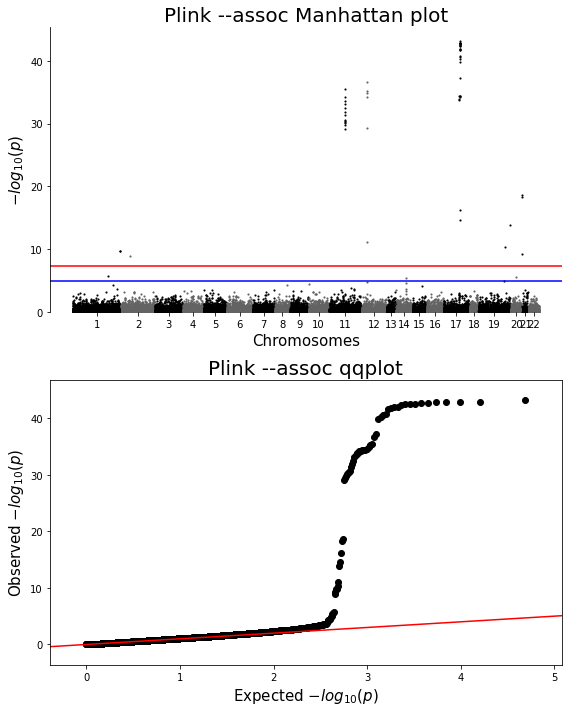

In [6]:
## generate plot figure
figure, axes = plt.subplots(nrows=2, ncols=1, figsize = (8,10))

qqman.manhattan(gwas_file_assoc, ax=axes[0], title="Plink --assoc Manhattan plot")
qqman.qqplot(gwas_file_assoc, ax=axes[1], title="Plink --assoc qqplot")

figure.tight_layout()

#### Write output plot files  

> set `show=False`

In [7]:
## generate Manhattan plot
qqman.manhattan(gwas_file_assoc, 
                out=plot_prefix_assoc+'.Manhattan.png', 
                show=False, 
                title='PLINK --assoc')

## generate qqplot
qqman.qqplot(gwas_file_assoc, 
                out=plot_prefix_assoc+'.qqplot.png', 
                show=False, 
                title='PLINK --assoc')

<br>  

## plot PLINK --logistic output

In [8]:
!head {gwas_file_logistic}

 CHR           SNP         BP   A1       TEST    NMISS         OR       SE      L95      U95         STAT            P 
   1      1_953259     953259    T        ADD     4712      1.063   0.1436   0.8024    1.409       0.4266       0.6697
   1      1_953279     953279    T        ADD     4698      1.096   0.1437   0.8267    1.452       0.6356       0.5251
   1      1_962358     962358    T        ADD     4724       1.13   0.1274   0.8807    1.451       0.9626       0.3358
   1      1_965125     965125    C        ADD     4698       1.01  0.07486   0.8718    1.169       0.1274       0.8986
   1     1_1014228    1014228    A        ADD     4679     0.9963  0.07194   0.8652    1.147     -0.05216       0.9584
   1     1_1014274    1014274    A        ADD     4691      1.237    0.136   0.9479    1.615        1.566       0.1173
   1     1_1047614    1047614    T        ADD     4734      0.997   0.1234   0.7828     1.27     -0.02414       0.9807
   1     1_1051820    1051820    C        ADD  

#### <font color='blue'> NOTE: need to extract P-values from --logistic output --> pass to qqplot function </font>

reason for this is unknown

In [9]:
df = pd.read_csv(gwas_file_logistic, header=0, delim_whitespace=True)

df.head()

pval_logistic = list(df['P'])
del df

CHR        SNP       BP A1 TEST  NMISS      OR       SE     L95    U95  \
0    1   1_953259   953259  T  ADD   4712  1.0630  0.14360  0.8024  1.409   
1    1   1_953279   953279  T  ADD   4698  1.0960  0.14370  0.8267  1.452   
2    1   1_962358   962358  T  ADD   4724  1.1300  0.12740  0.8807  1.451   
3    1   1_965125   965125  C  ADD   4698  1.0100  0.07486  0.8718  1.169   
4    1  1_1014228  1014228  A  ADD   4679  0.9963  0.07194  0.8652  1.147   

      STAT       P  
0  0.42660  0.6697  
1  0.63560  0.5251  
2  0.96260  0.3358  
3  0.12740  0.8986  
4 -0.05216  0.9584

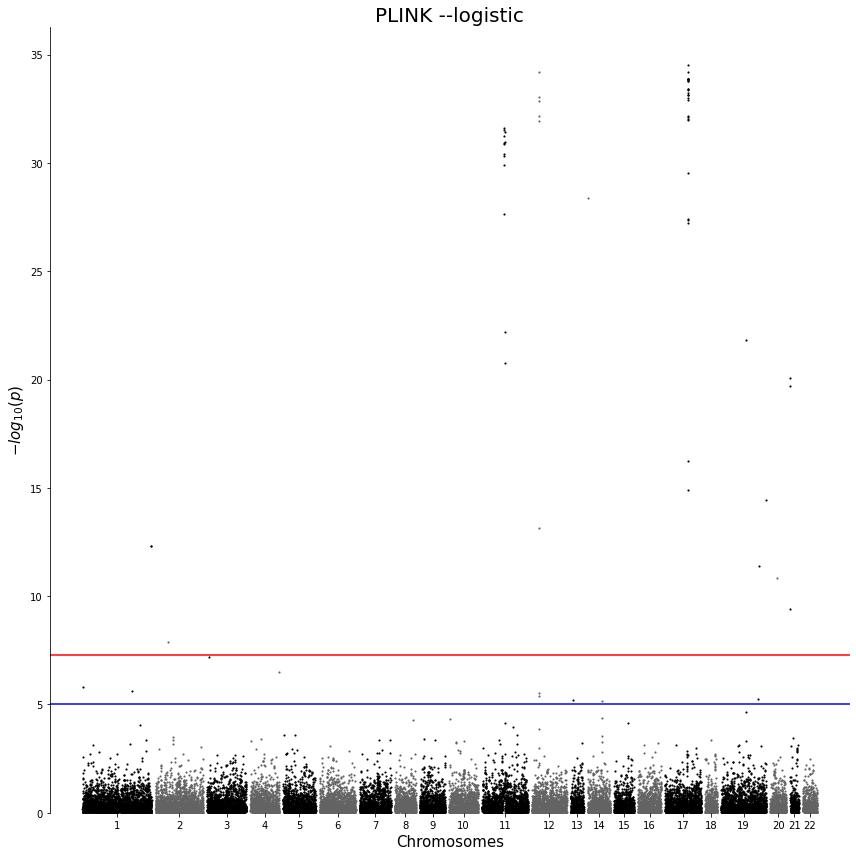

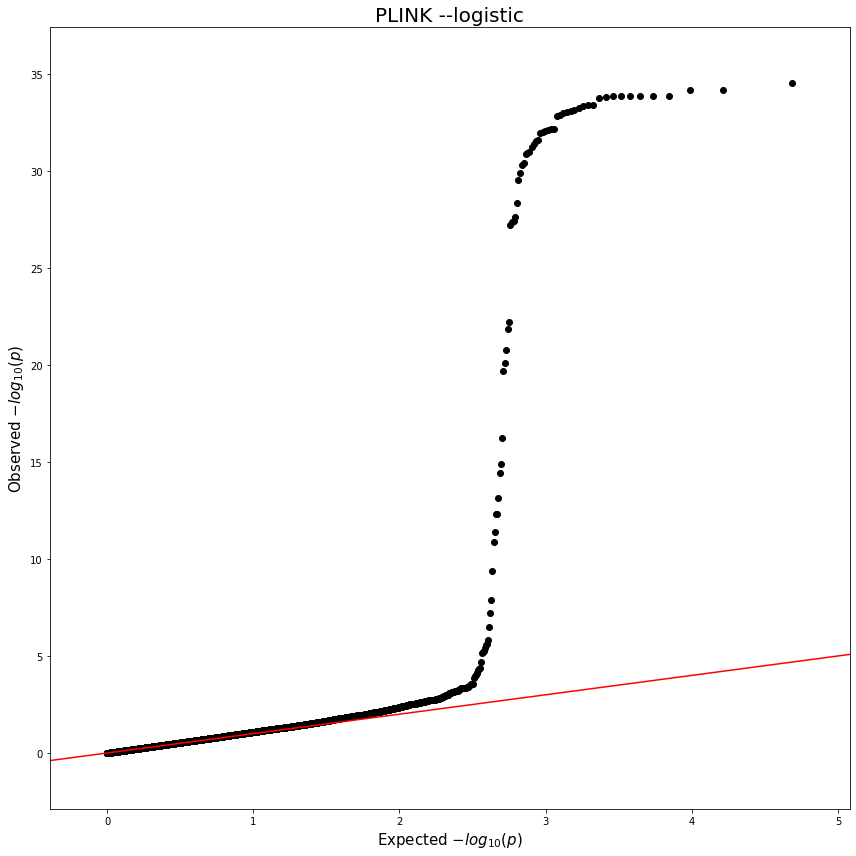

In [10]:
## generate Manhattan plot
qqman.manhattan(gwas_file_logistic, 
                out=plot_prefix_logistic+'.Manhattan.png', 
                show=True, 
                title='PLINK --logistic', 
                gap=50)

## generate qqplot
qqman.qqplot(pval_logistic, 
                out=plot_prefix_logistic+'.qqplot.png', 
                show=True, 
                title='PLINK --logistic')


#### Generate --logistic plots as subplot example

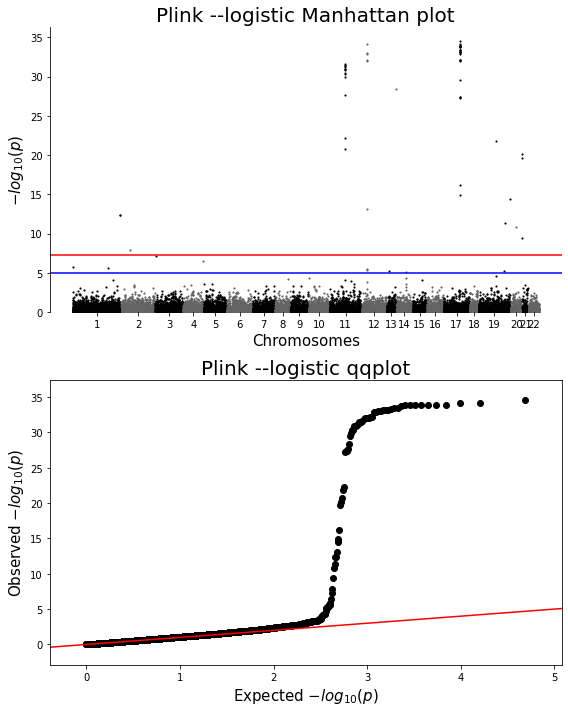

In [11]:
## generate plot figure
figure, axes = plt.subplots(nrows=2, ncols=1, figsize = (8,10))

qqman.manhattan(gwas_file_logistic, ax=axes[0], title="Plink --logistic Manhattan plot")
qqman.qqplot(pval_logistic, ax=axes[1], title="Plink --logistic qqplot")

figure.tight_layout()

#### Write output plot files  

> set `show=False`

In [12]:
## generate Manhattan plot
qqman.manhattan(gwas_file_logistic, 
                out=plot_prefix_logistic+'.Manhattan.png', 
                show=False, 
                title='PLINK --logistic', 
                gap=50)

## generate qqplot
qqman.qqplot(pval_logistic, 
                out=plot_prefix_logistic+'.qqplot.png', 
                show=False, 
                title='PLINK --logistic')

<br>  

## Example of how to format Manhattan plot

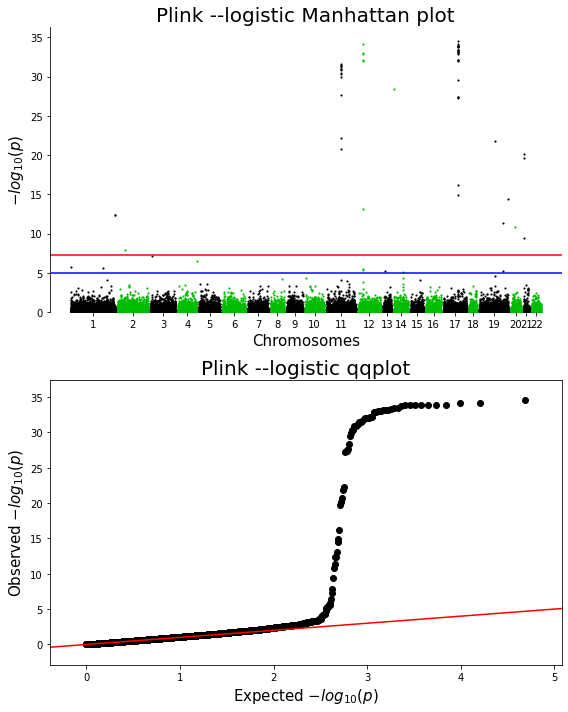

In [13]:
## generate plot figure
figure, axes = plt.subplots(nrows=2, ncols=1, figsize = (8,10))

qqman.manhattan(gwas_file_logistic, 
                ax=axes[0], 
                title="Plink --logistic Manhattan plot", 
                cmap=plt.get_cmap("nipy_spectral"), cmap_var=2, gap=50)

qqman.qqplot(pval_logistic, ax=axes[1], title="Plink --logistic qqplot")

figure.tight_layout()